In [12]:
## CSCA 5622 Supervised Learning Final Project

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
from os import path, getcwd

In [118]:
df = pd.read_csv(path.join(getcwd(), 'data', 'drug200.csv'))

In [119]:
# EDA
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [120]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [121]:
#### DataFrame Attributes
# 0. Age
# 1. Sex
# 2. BP (Blood Pressure)
# 3. Cholesterol
# 4. Na_to_K (Sodium to Potassium in blood)
# 5. Drug

# Data Preprocessing
df = df.drop_duplicates()
columns = ['Sex', 'BP', 'Cholesterol', 'Drug']

# Categories factors
for column in columns:
    print(f'{column}: {df[column].unique()}')
    
print(f'Age: Min({df['Age'].min()}), Max({df['Age'].max()})')

Sex: ['F' 'M']
BP: ['HIGH' 'LOW' 'NORMAL']
Cholesterol: ['HIGH' 'NORMAL']
Drug: ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']
Age: Min(15), Max(74)


In [122]:
#### EDA

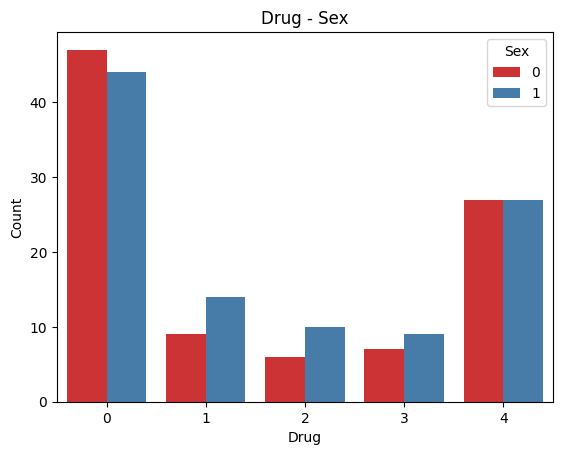

In [134]:
# Analyze Drug based on Sex
sns.barplot(x = "Drug", y = "Count", hue = "Sex", data = df.groupby(["Sex", "Drug"]).size().reset_index(name = "Count"), palette="Set1")
plt.title("Drug - Sex")
plt.show()
# We can see that other than DrugY, females consume more drugs than their male counterpart.

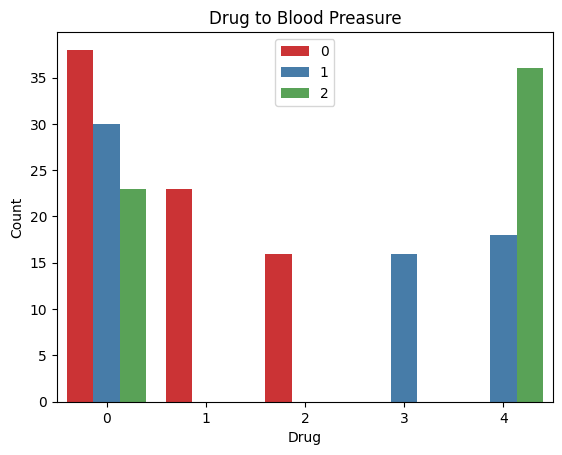

In [135]:
# Analyze Drug based on BP
sns.barplot(x = "Drug", y = "Count", hue = "BP", data = df.groupby(["Drug", "BP"]).size().reset_index(name = "Count"), palette="Set1")
plt.title("Drug to Blood Preasure")
plt.legend(loc='upper center')
plt.show()

# We can see that DrugY can be used regardless of blood preasure. DrugA and DrugB are only consumbed when blood pressure is high. DrugC can only be consumed when blood pressure is low. DrugX can be taken if blood pressure is low to normal range.

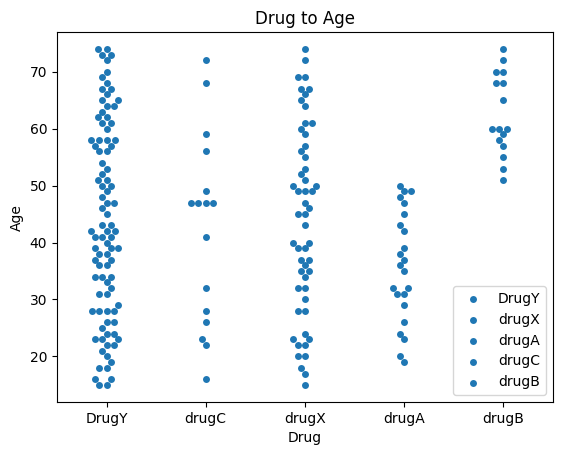

In [125]:
sns.swarmplot(x = "Drug", y = "Age", data = df)
plt.title("Drug to Age")
plt.legend(df.Drug.value_counts().index)
plt.show()

# DrugA is only taken by individuals between that ages of 20 and 50.
# DrugB is only taken by individuals between that ages of 50 and 70.
# DrugC is rarely prescribed.
# DrugY is prescribed the motst followed by DrugX.

In [126]:
def calculate_accuracy(true_labels, predicted_labels):
     # Ensure both arrays have the same shape
    if true_labels.shape != predicted_labels.shape:
        raise ValueError("Arrays must have the same shape.")

    return  f'Accuracy:{(np.sum(true_labels == predicted_labels) / true_labels.size) * 100}%'

In [127]:
# Setup
random_state = 42
#Preprocessing
for column in columns:
    df[column] = LabelEncoder().fit_transform(df[column])
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42)

In [128]:
# Decision Tree Classifier
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(x_train, y_train)

# Predicting values
decision_tree_classifier_prediction = decision_tree_classifier.predict(x_test)

# F1 score
decision_tree_classifier_f1_score = f1_score(y_test, decision_tree_classifier_prediction, average='weighted')

#confusion_matrix_
decision_tree_classifier_confusion_matrix = confusion_matrix(y_test, decision_tree_classifier_prediction)

In [129]:
# Random forest
random_forest_classifier_1 = RandomForestClassifier(random_state=random_state)
random_forest_classifier_2 = RandomForestClassifier(random_state=random_state)

# Accuarcy
accuarcy_1 = cross_val_score(random_forest_classifier_1, x_train, y_train, cv=5)
accuarcy_2 = GridSearchCV(random_forest_classifier_2, {'n_estimators': np.arange(1, 100), 'criterion':['gini','entropy']}, cv=5)

# Fit
random_forest_classifier_1.fit(X_train, y_train)
random_forest_classifier_2.fit(X_train, y_train)

# Predicting values
prediction_1 = random_forest_classifier_1.predict(x_test)
prediction_2 = random_forest_classifier_2.predict(x_test)


# F1 score
random_forest_classifier_1_f1_score = f1_score(y_test, prediction_1, average='weighted')
random_forest_classifier_2_f1_score = f1_score(y_test, prediction_2, average='weighted')

#confusion_matrix
random_forest_classifier_1_confusion_matrix = confusion_matrix(y_test, prediction_1)
random_forest_classifier_2_confusion_matrix = confusion_matrix(y_test, prediction_2)


In [130]:
# K-Nearest Neighbors (KNN)
knn_cross_validation = GridSearchCV(KNeighborsClassifier(), {'n_neighbors': np.arange(1,100)})
knn_cross_validation.fit(x_train, y_train)

# Predicting values
knn_cross_validation_preiction = knn_cross_validation.predict(X_test)

# F1 score
knn_f1_score = f1_score(y_test, knn_cross_validation_preiction, average='weighted')

#confusion_matrix
knn_cross_validation_confusion_matrix = confusion_matrix(y_test, knn_cross_validation_preiction)

Text(0.5, 1.0, 'Random Forest Classifier : Accuracy:100.0%')

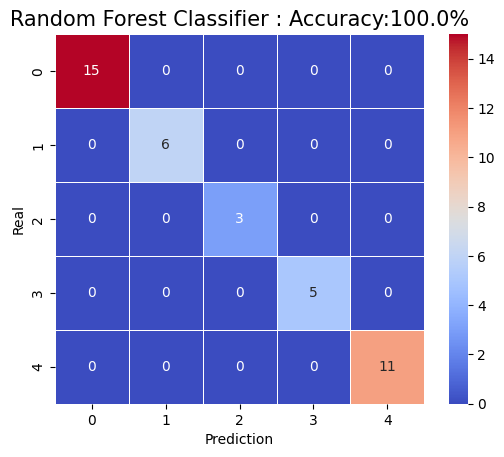

In [131]:
sns.heatmap(data=random_forest_classifier_1_confusion_matrix,linewidths=.5, annot=True, square = True, cmap='coolwarm')
plt.ylabel('Real')
plt.xlabel('Prediction')
plt.title(f'Random Forest Classifier : {calculate_accuracy(random_forest_classifier_1_confusion_matrix, random_forest_classifier_2_confusion_matrix)}', size = 15)

Text(0.5, 1.0, 'Decision Tree Classifier : Accuracy:100.0%')

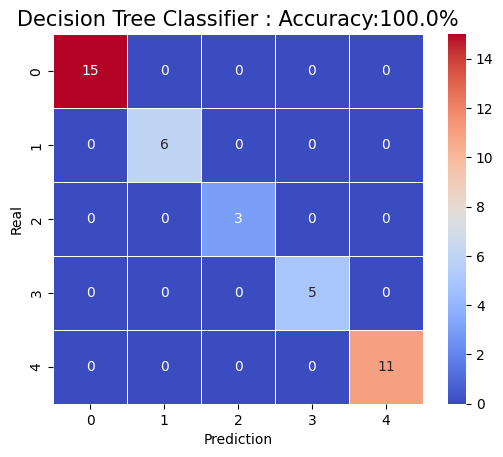

In [132]:
sns.heatmap(data=decision_tree_classifier_confusion_matrix,linewidths=.5, annot=True, square = True, cmap='coolwarm')
plt.ylabel('Real')
plt.xlabel('Prediction')
plt.title(f'Decision Tree Classifier : {calculate_accuracy(random_forest_classifier_1_confusion_matrix, decision_tree_classifier_confusion_matrix)}', size = 15)

Text(0.5, 1.0, 'Decision Tree Classifier : 0.65')

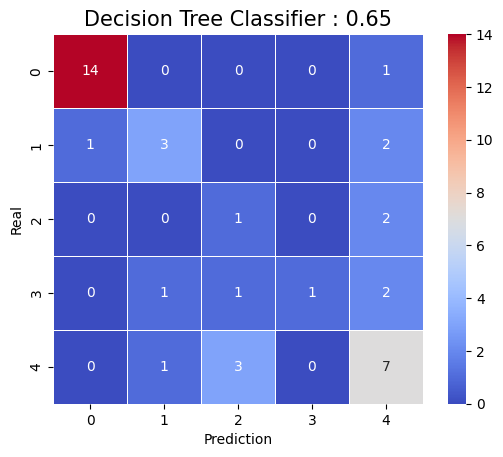

In [133]:
sns.heatmap(data=knn_cross_validation_confusion_matrix,linewidths=.5, annot=True, square = True, cmap='coolwarm')
plt.ylabel('Real')
plt.xlabel('Prediction')
plt.title(f'Decision Tree Classifier : {knn_cross_validation.score(x_test, y_test)}', size = 15)